In [16]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from func import metryka_minkowskiego

In [74]:
y = np.array([0, 0])
punkty = np.empty((0, 2))

for i in np.arange(1, 1000, 0.5):
    for j in np.arange(1, 1000, 0.5):
        x = np.array([i/1000, j/1000])
        if abs(metryka_minkowskiego(x, y, 1) - 1) < 0.0001:
            punkty = np.vstack((punkty, x))

In [108]:
pkt = np.array([np.linspace(0, 1, 1000), np.linspace(0, 1, 1000)]).T
tablica = ((np.array([np.linspace(0, 1, 1000), np.linspace(0, 1, 1000)]).T - np.array([0, 0]))**2).sum(axis=1)**0.5
indeksy= np.where(abs(tablica - 1) < 0.001)[0]
pkt[indeksy].T

array([[0.70670671, 0.70770771],
       [0.70670671, 0.70770771]])

In [101]:
x = pkt[indeksy].transpose()[0,:]
y = pkt[indeksy].transpose()[1,:]

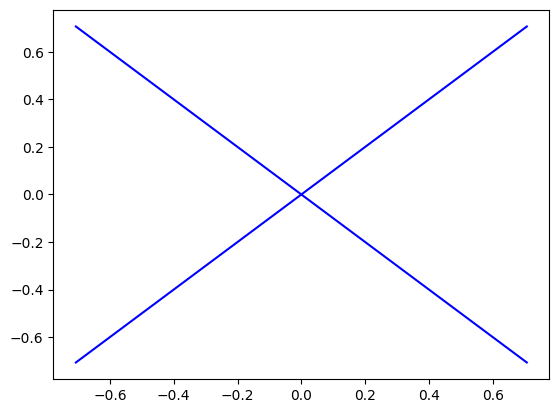

In [102]:
plt.plot(x, y, linestyle = 'solid', color='blue')
plt.plot(-x, y, linestyle = 'solid', color='blue')
plt.plot(x, -y, linestyle = 'solid', color='blue')
plt.plot(-x, -y, linestyle = 'solid', color='blue')


In [50]:
import numpy as np

def metryka_minkowskiego(x, y, p):
    return np.sum(np.abs(x - y)**p)**(1/p)

y = np.array([0, 0])
lista = np.empty((0, 2))  # nie używaj 'list' jako zmiennej – to słowo kluczowe Pythona
epsilon = 1e-6

for i in range(1000):
    for j in range(1000):
        x = np.array([i/100, j/100])
        if abs(metryka_minkowskiego(x, y, 1/4) - 1) < epsilon:
            lista = np.vstack((lista, x))


In [131]:
X, Y = np.meshgrid(np.arange(0, 2, 0.001), np.arange(0, 2, 0.001))
points = np.stack([X.ravel(), Y.ravel()], axis=1)

dists = np.sum(np.abs(points)**(1/2), axis=1)
selected = points[np.abs(dists - 1) < 0.0001]

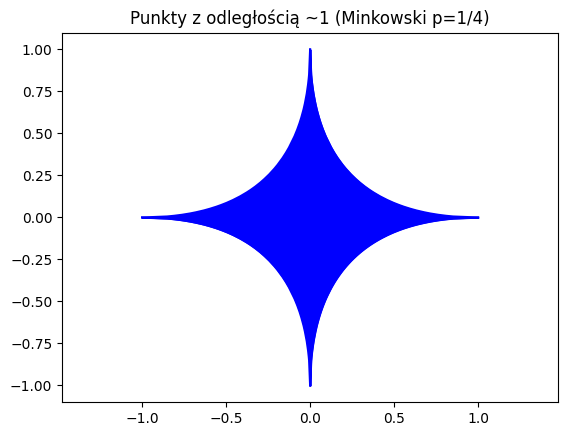

In [143]:
plt.plot(selected[:, 0], selected[:, 1], linestyle='solid', color='blue')
plt.plot(-selected[:, 0], selected[:, 1], linestyle='solid', color='blue')
plt.plot(selected[:, 0], -selected[:, 1], linestyle='solid', color='blue')
plt.plot(-selected[:, 0], -selected[:, 1], linestyle='solid', color='blue')

plt.fill_between(selected[:, 0], np.zeros(selected.shape[0]), selected[:, 1], color='blue', alpha=1)
plt.fill_between(-selected[:, 0], np.zeros(selected.shape[0]), selected[:, 1], color='blue', alpha=1)
plt.fill_between(selected[:, 0], np.zeros(selected.shape[0]), -selected[:, 1], color='blue', alpha=1)
plt.fill_between(-selected[:, 0], np.zeros(selected.shape[0]), -selected[:, 1], color='blue', alpha=1)

plt.axis('equal')
plt.title("Punkty z odległością ~1 (Minkowski p=1/4)")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kula(typ, metryka, srodek_x, srodek_y, promien):
    if typ not in ['domknieta','otwarta','sfera']:
        raise ValueError("Typ musi być 'domknieta', 'otwarta' lub 'sfera'")
    X, Y = np.meshgrid(np.arange(0, promien, 0.001), np.arange(0, promien, 0.001))
    points = np.stack([X.ravel(), Y.ravel()], axis=1)
    if metryka > 0 and metryka < 1:
        dists = np.sum(np.abs(points - np.array([srodek_x, srodek_y]))**metryka, axis=1)
    elif metryka >= 1:
        dists = np.sum(np.abs(points - np.array([srodek_x, srodek_y]))**metryka, axis=1)**(1/metryka)
    elif metryka == float('inf'):
        dists = np.max(np.abs(points - np.array([srodek_x, srodek_y])), axis=1)

    selected = points[np.abs(dists - promien) < 0.001]

    if typ == 'domknieta':
        # mask = dists <= promien
        # selected = points[mask]

        plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(-selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(-selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')

        plt.fill_between(selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.fill_between(-selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.fill_between(selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), -selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.fill_between(-selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), -selected[:, 1]+srodek_y, color='blue', alpha=1)

    elif typ == 'otwarta':
        # mask = dists < promien
        # selected = points[mask]
        plt.plot(selected[:, 0]+srodek_x, selected[:, 1], linestyle='dashed', color='red')
        plt.plot(-selected[:, 0]+srodek_x, selected[:, 1], linestyle='dashed', color='red')
        plt.plot(selected[:, 0]+srodek_x, -selected[:, 1], linestyle='dashed', color='red')
        plt.plot(-selected[:, 0]+srodek_x, -selected[:, 1], linestyle='dashed', color='red')

        plt.fill_between(selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.fill_between(-selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.fill_between(selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), -selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.fill_between(-selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), -selected[:, 1]+srodek_y, color='blue', alpha=1)

    elif typ == 'sfera':
        # mask = np.abs(dists - promien) < 0.01
        # selected = points[mask]
        plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(-selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(-selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')

    plt.axis('equal')
    plt.title(f"Kula {typ} o środku w punkcie {srodek_x,srodek_y}, promieniu {promien} przy metryce (Minkowskiego p={metryka})")
    plt.show()



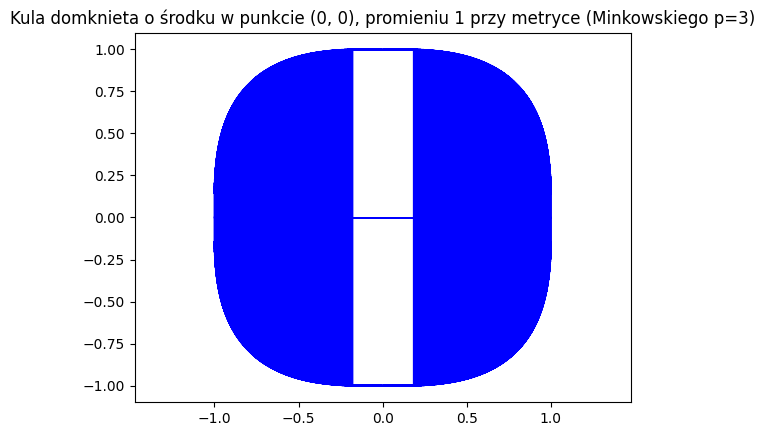

In [26]:
kula('domknieta',3,0,0,1)

In [ ]:
X, Y = np.meshgrid(np.arange(0, 2, 0.001), np.arange(0, 2, 0.001))
points = np.stack([X.ravel(), Y.ravel()], axis=1)

dists = np.sum(np.abs(points)**(1/2), axis=1)
selected = points[np.abs(dists - 1) < 0.0001]

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 149

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kula(typ, metryka, srodek_x, srodek_y, promien):
    if typ not in ['domknieta', 'otwarta', 'sfera']:
        raise ValueError("Typ musi być 'domknieta', 'otwarta' lub 'sfera'")
    if metryka <= 0:
        raise ValueError("Metryka Minkowskiego musi być większa od zera")

    # Siatka punktów w pełnym zakresie
    zakres = np.arange(-promien, promien + 0.001, 0.01)
    X, Y = np.meshgrid(zakres, zakres)
    points = np.stack([X.ravel(), Y.ravel()], axis=1)

    # Obliczanie odległości Minkowskiego
    if metryka < 1:
        dists = np.sum(np.abs(points)**metryka, axis=1)
    elif metryka == float('inf'):
        dists = np.max(np.abs(points), axis=1)
    else:
        dists = np.sum(np.abs(points)**metryka, axis=1)**(1/metryka)

    # Dobór punktów w zależności od typu kuli
    if typ == 'domknieta':
        mask = dists <= promien
        selected = points[mask]
        kolor = 'blue'
        alpha = 0.7
    elif typ == 'otwarta':
        mask = dists < promien
        selected = points[mask]
        kolor = 'red'
        alpha = 0.5
    elif typ == 'sfera':
        mask = np.abs(dists - promien) < 0.01
        selected = points[mask]
        kolor = 'green'
        alpha = 1.0

    # Rysowanie
    fig, ax = plt.subplots()
    if typ in ['domknieta', 'otwarta']:
        ax.scatter(selected[:, 0] + srodek_x, selected[:, 1] + srodek_y, s=0.2, color=kolor, alpha=alpha)
    else:  # sfera
        ax.plot(selected[:, 0] + srodek_x, selected[:, 1] + srodek_y, linestyle='solid', color=kolor)

    ax.set_aspect('equal')
    ax.set_title(f"Kula {typ} o środku {srodek_x,srodek_y}, promieniu {promien}, metryka Minkowskiego p={metryka}")
    plt.grid(True)
    plt.show()


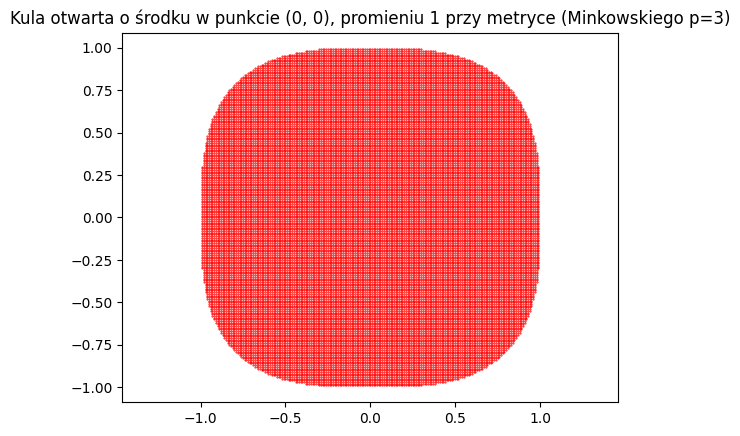

In [32]:
kula('otwarta',3,0,0,1)

In [177]:
import numpy as np
import matplotlib.pyplot as plt

def kula(typ, metryka, srodek_x, srodek_y, promien):
    if typ not in ['domknieta','otwarta','sfera']:
        raise ValueError("Typ musi być 'domknieta', 'otwarta' lub 'sfera'")
    
    if metryka > 0 and metryka < 1:
        X, Y = np.meshgrid(np.arange(-(promien**(1/metryka)), promien**(1/metryka), 0.01), np.arange(-promien**(1/metryka), promien**(1/metryka), 0.001))
    else:
        X, Y = np.meshgrid(np.arange(-(promien), promien, 0.01), np.arange(-promien, promien, 0.001))
        
    points = np.stack([X.ravel(), Y.ravel()], axis=1)
    if metryka > 0 and metryka < 1:
        dists = np.sum(np.abs(points - np.array([srodek_x, srodek_y]))**metryka, axis=1)
    elif metryka >= 1:
        dists = np.sum(np.abs(points - np.array([srodek_x, srodek_y]))**metryka, axis=1)**(1/metryka)
    elif metryka == float('inf'):
        dists = np.max(np.abs(points - np.array([srodek_x, srodek_y])), axis=1)


    if typ == 'domknieta':
        mask = dists <= promien
        selected = points[mask]

        # plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        # plt.plot(-selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        # plt.plot(selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        # plt.plot(-selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')

        # plt.fill_between(selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), selected[:, 1]+srodek_y, color='blue', alpha=1)
        # plt.fill_between(-selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), selected[:, 1]+srodek_y, color='blue', alpha=1)
        # plt.fill_between(selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), -selected[:, 1]+srodek_y, color='blue', alpha=1)
        # plt.fill_between(-selected[:, 0]+srodek_x, np.zeros(selected.shape[0]), -selected[:, 1]+srodek_y, color='blue', alpha=1)
        plt.scatter(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, s=0.2, color='blue', alpha=1)

    elif typ == 'otwarta':
        mask_int = dists <= promien
        mask_border = (np.abs(dists - promien) < 0.001) #& (points[:, 0] >= 0) & (points[:, 1] >= 0)
        interior = points[mask_int]
        border = points[mask_border]
        angles = np.arctan2(border[:, 1], border[:, 0])
        order = np.argsort(angles)  
        selected = border[order]
        # selected_pos = border[border[:,1] >= 0]
        # selected_pos_ordered = selected_pos[np.argsort(selected_pos[:, 0])]
        # selected_neg = border[border[:,1] < 0]
        # selected_neg_ordered = selected_neg[np.argsort(selected_neg[:, 0])]
        
        plt.scatter(interior[:, 0]+srodek_x, interior[:, 1]+srodek_y, s=0.2, color='blue', alpha=1)

        plt.plot(selected[:, 0]+srodek_x, selected[:, 1], linestyle='dashed', color='red')
        # plt.plot(selected_neg_ordered[:, 0]+srodek_x, selected_neg_ordered[:, 1], linestyle='dashed', color='red')
        plt.legend(['Wnętrze kuli', 'Brzeg kuli'], loc='upper right')



    elif typ == 'sfera':
        # mask = np.abs(dists - promien) < 0.01
        # selected = points[mask]
        plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(-selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.plot(-selected[:, 0]+srodek_x, -selected[:, 1]+srodek_y, linestyle='solid', color='blue')

    plt.axis('equal')
    plt.title(f"Kula {typ} o środku w punkcie {srodek_x,srodek_y}, promieniu {promien} przy metryce (Minkowskiego p={round(metryka, 2)})")
    plt.show()



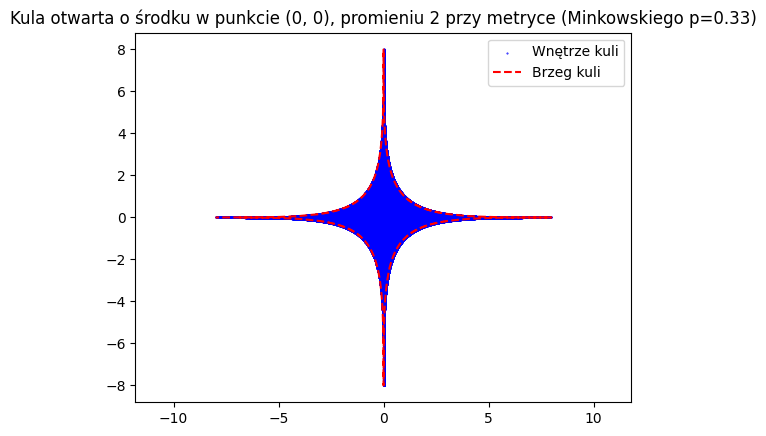

In [179]:
kula('otwarta',1/3,0,0,2)

In [68]:
selected_norder = np.array([np.linspace(0, 1, 1000),np.linspace(0, 1, 1000)])
sorted_points = selected_norder[np.argsort(selected_norder[:, 0])]


In [69]:
sorted_points

array([[0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ],
       [0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ]])

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def kula(typ, metryka, srodek_x, srodek_y, promien):
    if typ not in ['domknieta','otwarta','sfera']:
        raise ValueError("Typ musi być 'domknieta', 'otwarta' lub 'sfera'")
    
    if metryka > 0 and metryka < 1:
        X, Y = np.meshgrid(np.arange(-(promien**(1/metryka))+srodek_x, promien**(1/metryka)+srodek_x, 0.01), np.arange(-promien**(1/metryka)+srodek_y, promien**(1/metryka)+srodek_y, 0.01))
    else:
        X, Y = np.meshgrid(np.arange(-(promien)+srodek_x, promien+srodek_x, 0.01), np.arange(-promien+srodek_y, promien+srodek_y, 0.01))
        
    points = np.stack([X.ravel(), Y.ravel()], axis=1)
    if metryka > 0 and metryka < 1:
        dists = np.sum(np.abs(points - np.array([srodek_x, srodek_y]))**metryka, axis=1)
    elif metryka >= 1:
        dists = np.sum(np.abs(points - np.array([srodek_x, srodek_y]))**metryka, axis=1)**(1/metryka)
    elif metryka == float('inf'):
        dists = np.max(np.abs(points - np.array([srodek_x, srodek_y])), axis=1)


    if typ == 'domknieta':
        mask_int = dists <= promien
        mask_border = (np.abs(dists - promien) < 0.001)
        interior = points[mask_int]
        border = points[mask_border]
        relative = border - np.array([srodek_x, srodek_y])
        angles = np.arctan2(relative[:, 1], relative[:, 0])
        order = np.argsort(angles)  
        selected = border[order]

        plt.scatter(interior[:, 0]+srodek_x, interior[:, 1]+srodek_y, s=0.1, color='blue', alpha=1)
        plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.legend(['Kula domknięta'], loc='upper right')


    elif typ == 'otwarta':
        mask_int = dists <= promien
        mask_border = (np.abs(dists - promien) < 0.001)
        interior = points[mask_int]
        border = points[mask_border]
        relative = border - np.array([srodek_x, srodek_y])
        angles = np.arctan2(relative[:, 1], relative[:, 0])
        order = np.argsort(angles)  
        selected = border[order]

        plt.scatter(interior[:, 0]+srodek_x, interior[:, 1]+srodek_y, s=0.1, color='blue', alpha=1)
        plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='dashed', color='red')
        plt.legend(['Wnętrze kuli', 'Brzeg kuli'], loc='upper right')



    elif typ == 'sfera':
        mask_border = (np.abs(dists - promien) < 0.01)
        border = points[mask_border]
        relative = border - np.array([srodek_x, srodek_y])
        angles = np.arctan2(relative[:, 1], relative[:, 0])
        order = np.argsort(angles)  
        selected = border[order]
        plt.plot(selected[:, 0]+srodek_x, selected[:, 1]+srodek_y, linestyle='solid', color='blue')
        plt.legend(['Sfera'], loc='upper right')

    plt.axis('equal')
    plt.title(f"{'Sfera' if typ == 'sfera' else 'Kula ' + typ} o środku w punkcie {srodek_x, srodek_y}, promieniu {promien} przy metryce (Minkowskiego p={round(metryka, 2)})")
    plt.show()



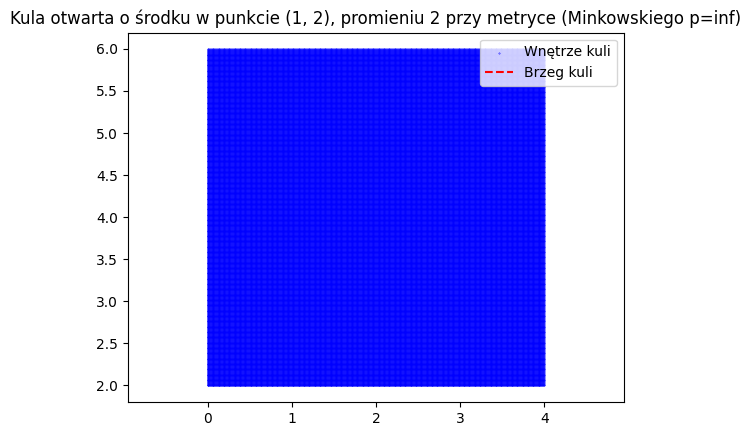

In [68]:
kula('otwarta',float('inf'),1,2,2)